# Assignment 2

## Convolutional neural network

Develop the complete training and evaluation pipeline for a convolutional neural network model.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts and images should also be displayed in this notebook.

### Model training and evaluation

Define the function `cnn_train` for training and evaluating a CNN model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in the parameters listed in the code cell bellow. We will test it with various values!

The architecture of the CNN shall be composed of blocks, where each block contains 
* a convolutional layer with 3x3 kernel without any downsampling
* nonlinearity (your choice)
* 2x2 maxpooling layer with stride 2

The number of output channels in these blocks shall be flexible to be set by the user within `out_channels`.
The network shall finish by 2 fully connected layers to produce the outputs (you will need to automate the sizing of these so that it can continue from arbitrary setting of the blocks that preceed it).

All other decisions related to the complete train and test pipeline you need to do on your own.

The `cnn_train` function shall return 
* the trained model `cnn_model`
* train and test losses in a 2-long tuple `(train_losses, test_losses)`, where train and test losses are simple python lists
* anything else you deem important or useful (this is for you really, in case you want to re-use the function later etc.)

Furthermore, the function shall be able to produce monitoring plots of train and test losses and train and test accuracies.
There is no pre-defined design for the plots.
However, you shall annotate the graphs so that they are well readable and understandable.

Epoch [1/10], Train Loss: 0.4266, Test Loss: 0.3381, Accuracy: 84.73
Epoch [2/10], Train Loss: 0.2768, Test Loss: 0.2741, Accuracy: 89.89
Epoch [3/10], Train Loss: 0.2354, Test Loss: 0.2734, Accuracy: 91.39
Epoch [4/10], Train Loss: 0.2109, Test Loss: 0.2646, Accuracy: 92.26
Epoch [5/10], Train Loss: 0.1892, Test Loss: 0.2692, Accuracy: 93.16
Epoch [6/10], Train Loss: 0.1729, Test Loss: 0.2667, Accuracy: 93.82
Epoch [7/10], Train Loss: 0.1577, Test Loss: 0.2835, Accuracy: 94.16
Epoch [8/10], Train Loss: 0.1427, Test Loss: 0.2919, Accuracy: 94.82
Epoch [9/10], Train Loss: 0.1322, Test Loss: 0.2916, Accuracy: 95.04
Epoch [10/10], Train Loss: 0.1204, Test Loss: 0.3141, Accuracy: 95.63


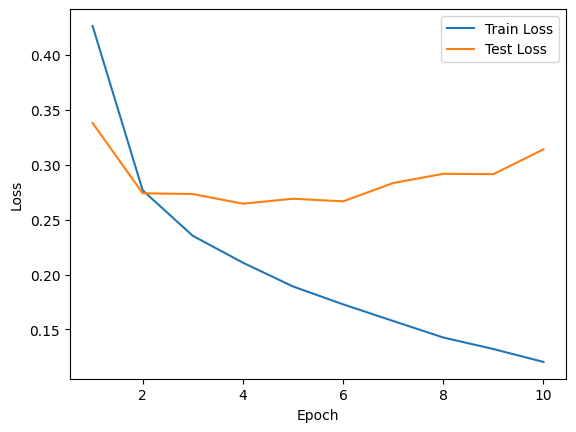

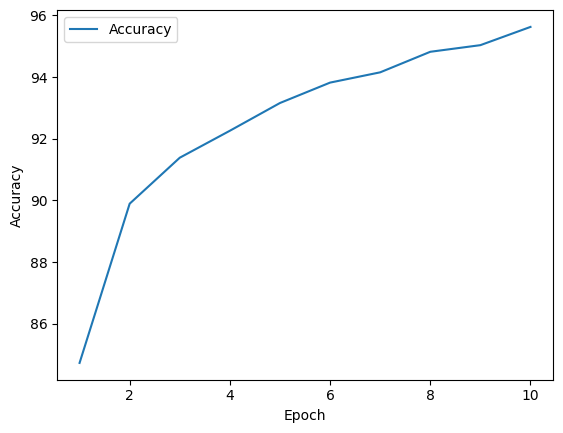

CNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch
# define function cnn_train so that it can be run from this cell
from CNN import cnn_train

# Set the hyperparameters
out_channels = [16, 32, 128]  # Number of output channels in the CNN blocks
num_epochs = 10
batch_size = 34
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plots = True  # Set to True to produce plots of train and test losses

# Train the CNN model
cnn_model, (train_losses, test_losses, accuracies) = cnn_train(out_channels, num_epochs, batch_size, learning_rate, device, plots)
print(cnn_model)

### Model application

Define a simple utility function `cnn_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

Accuracy of the network on the test images: 100.00 %


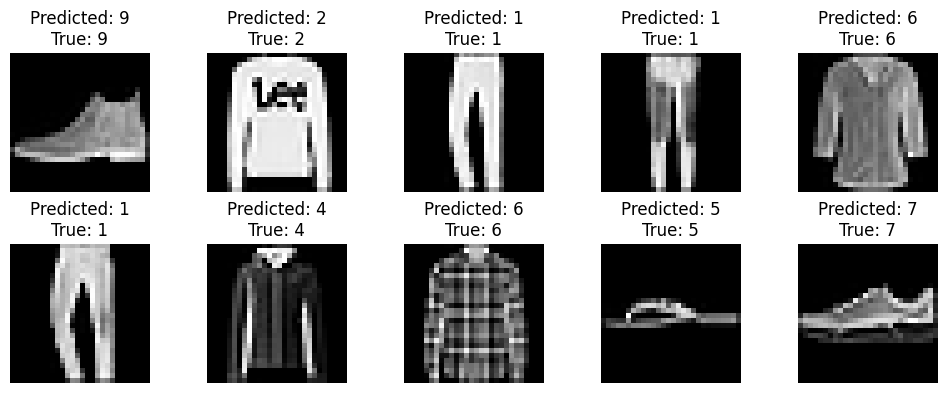

In [24]:
# define function mlp_train so that it can be run from this cell
from CNN import cnn_apply

# Apply the trained model on specific examples from the test set
test_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Indexes of examples from the test set
cnn_apply(cnn_model, test_indexes)

Accuracy of the network on the test images: 90.92 %


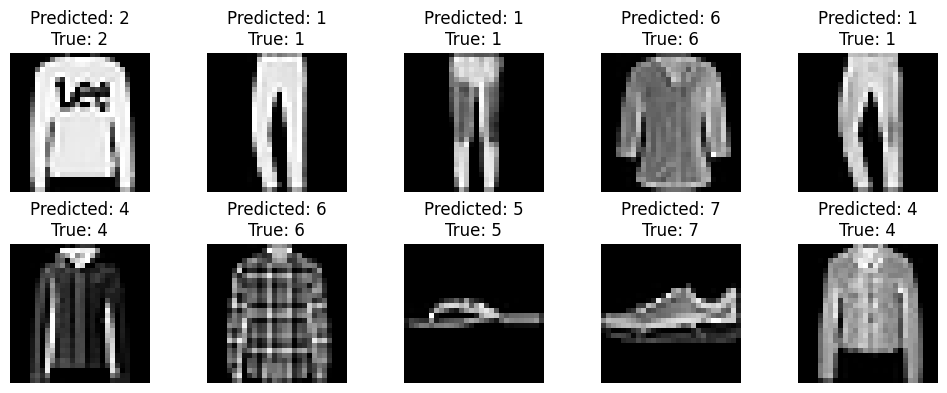

In [25]:
# testing the mlp model with all of the test set images
test_indexes = list(range(1,10000))
cnn_apply(cnn_model, test_indexes)

### Train and apply model

Use your functions defined above to train the cnn model. Try different values of the hyper-paramter (user parameters) settings. You shall achieve better test accuracy than in the mlp model from Part 1.

Produce the results (plots etc.) here and comment shortly on the results and the hyper-parameters you tested.

# Testing of different Hyperparameters

Try-1 

```
out_channels = [16, 32, 64] 
num_epochs = 12
batch_size = 120
learning_rate = 0.001
```
**Training accuracy** -> 94.26 || **Testing accuracy **-> 90.52



Try-2

```
out_channels = [16, 32, 128] 
num_epochs = 15
batch_size = 120
learning_rate = 0.001
 ```

Training accuracy -> 94.23 || Testing accuracy -> 90.72


Try-3 

```
out_channels = [16, 32, 128] 
num_epochs = 15
batch_size = 120
learning_rate = 0.01
```

Training accuracy -> 87.75 || Testing accuracy -> 84.73 

The above try with the changed learning rate from the previous tries show us that the model is not able to get to the global minima and hence we see that the model is not performing well for the training data itself compared to the other tries and there is large gap between two train_loss and test_loss 


Try-4

```
out_channels = [16, 32, 128,256]  # Number of output channels in the CNN blocks
num_epochs = 10
batch_size = 34
learning_rate = 0.001
```

Training accuracy -> 95.22 || Test accuracy -> 90.79

This is the best accuracy achieved so far with the training dataset and the testing set as well .
But it looks like the model is getting overfitted on the training set as the loss for it is very less and the loss for the testing set is far because of overfitting.


Try - 5

```
out_channels = [16, 32, 128,256]  
num_epochs = 20
batch_size = 34
learning_rate = 0.001
```

Training accuracy -> 97.83 || Test accuracy -> 90.47% 

The above try shows us that this is clear overfitting to the dataset as the train loss on the train set is 0.0601 and test set is 0.47 which determines that the model learned the train set very well and failed to generalize to the testing set.



## Final Model Parameters 

``` out_channels = [16, 32, 128] 
num_epochs = 10
batch_size = 34
learning_rate = 0.001
```

Train loss ->   0.1204             Train Accuracy -> 95.63
Test loss  ->   0.3141             Test  Accuracy -> 90.92 

### Optional voluntary exercise

Try to enhance your CNN architecture by introducing skip connections around the CNN blocks (as in ResNet model)? Can you achieve better results with the same number of epochs?